In [512]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [513]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [514]:
NUM_CLASSES = 21

# Dataset reading

In [515]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [516]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [518]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [519]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [520]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_48 (Dropout)        (None, 86)                0         
                                                                 
 dense_72 (Dense)            (None, 100)               8700      
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_73 (Dense)            (None, 50)                5050      
                                                                 
 dense_74 (Dense)            (None, 21)                1071      
                                                                 
Total params: 14821 (57.89 KB)
Trainable params: 14821 (57.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [521]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [522]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [523]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2100
12/15 [=======================>......] - ETA: 0s - loss: 3.0317 - accuracy: 0.0742 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 1s 27ms/step - loss: 3.0056 - accuracy: 0.0877 - val_loss: 2.7549 - val_accuracy: 0.2441
Epoch 2/2100
12/15 [=======================>......] - ETA: 0s - loss: 2.7321 - accuracy: 0.1895
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 12ms/step - loss: 2.7067 - accuracy: 0.1907 - val_loss: 2.4588 - val_accuracy: 0.2647


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/2100
11/15 [=====================>........] - ETA: 0s - loss: 2.4293 - accuracy: 0.2450
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 11ms/step - loss: 2.4064 - accuracy: 0.2520 - val_loss: 2.1714 - val_accuracy: 0.4469
Epoch 4/2100
13/15 [=========================>....] - ETA: 0s - loss: 2.1998 - accuracy: 0.2885
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 2.1874 - accuracy: 0.2911 - val_loss: 1.9545 - val_accuracy: 0.4628
Epoch 5/2100
14/15 [===========================>..] - ETA: 0s - loss: 2.0072 - accuracy: 0.3655
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 11ms/step - loss: 1.9983 - accuracy: 0.3677 - val_loss: 1.7552 - val_accuracy: 0.5499
Epoch 6/2100
 1/15 [=>............................] - ETA: 0s - loss: 1.8980 - accuracy: 0.3359

12/15 [=======================>......] - ETA: 0s - loss: 0.5182 - accuracy: 0.8034
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 11ms/step - loss: 0.5137 - accuracy: 0.8056 - val_loss: 0.2341 - val_accuracy: 0.9746
Epoch 31/2100
15/15 [==============================] - ETA: 0s - loss: 0.5022 - accuracy: 0.8236
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 0.5022 - accuracy: 0.8236 - val_loss: 0.2277 - val_accuracy: 0.9651
Epoch 32/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.4358 - accuracy: 0.8281
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 8ms/step - loss: 0.4765 - accuracy: 0.8294 - val_loss: 0.2209 - val_accuracy: 0.9493
Epoch 33/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8359
Epoch 3

12/15 [=======================>......] - ETA: 0s - loss: 0.3404 - accuracy: 0.8646
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 11ms/step - loss: 0.3335 - accuracy: 0.8669 - val_loss: 0.1342 - val_accuracy: 0.9683
Epoch 58/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8672
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 8ms/step - loss: 0.3218 - accuracy: 0.8774 - val_loss: 0.1315 - val_accuracy: 0.9699
Epoch 59/2100
13/15 [=========================>....] - ETA: 0s - loss: 0.3335 - accuracy: 0.8696
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 10ms/step - loss: 0.3232 - accuracy: 0.8743 - val_loss: 0.1402 - val_accuracy: 0.9271
Epoch 60/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.3379 - accuracy: 0.8281
Epoch 

 1/15 [=>............................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8516
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 0.2807 - accuracy: 0.8896 - val_loss: 0.1067 - val_accuracy: 0.9794
Epoch 85/2100
12/15 [=======================>......] - ETA: 0s - loss: 0.2608 - accuracy: 0.8997
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 12ms/step - loss: 0.2633 - accuracy: 0.8986 - val_loss: 0.1036 - val_accuracy: 0.9762
Epoch 86/2100
14/15 [===========================>..] - ETA: 0s - loss: 0.2653 - accuracy: 0.9012
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 10ms/step - loss: 0.2659 - accuracy: 0.9007 - val_loss: 0.1025 - val_accuracy: 0.9731
Epoch 87/2100
14/15 [===========================>..] - ETA: 0s - loss: 0.2541 - accuracy: 0.8934
Epoch 

Epoch 111/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.2570 - accuracy: 0.9219
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 0.2480 - accuracy: 0.9049 - val_loss: 0.0942 - val_accuracy: 0.9635
Epoch 112/2100
15/15 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.9165
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 11ms/step - loss: 0.2266 - accuracy: 0.9165 - val_loss: 0.0834 - val_accuracy: 0.9794
Epoch 113/2100
15/15 [==============================] - ETA: 0s - loss: 0.2309 - accuracy: 0.9113
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 0.2309 - accuracy: 0.9113 - val_loss: 0.0851 - val_accuracy: 0.9842
Epoch 114/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.1683 - acc

Epoch 138/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.2499 - accuracy: 0.9062
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 10ms/step - loss: 0.1934 - accuracy: 0.9276 - val_loss: 0.0739 - val_accuracy: 0.9873
Epoch 139/2100
10/15 [===================>..........] - ETA: 0s - loss: 0.2352 - accuracy: 0.9141
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 15ms/step - loss: 0.2173 - accuracy: 0.9197 - val_loss: 0.0729 - val_accuracy: 0.9778
Epoch 140/2100
 9/15 [=================>............] - ETA: 0s - loss: 0.2209 - accuracy: 0.9227
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 15ms/step - loss: 0.2119 - accuracy: 0.9239 - val_loss: 0.0680 - val_accuracy: 0.9873
Epoch 141/2100
13/15 [=========================>....] - ETA: 0s - loss: 0.2043 - a

Epoch 165/2100
13/15 [=========================>....] - ETA: 0s - loss: 0.1896 - accuracy: 0.9303
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 13ms/step - loss: 0.1909 - accuracy: 0.9297 - val_loss: 0.0667 - val_accuracy: 0.9905
Epoch 166/2100
11/15 [=====================>........] - ETA: 0s - loss: 0.1970 - accuracy: 0.9226
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 10ms/step - loss: 0.1950 - accuracy: 0.9229 - val_loss: 0.0678 - val_accuracy: 0.9937
Epoch 167/2100
15/15 [==============================] - ETA: 0s - loss: 0.1992 - accuracy: 0.9234
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 0.1992 - accuracy: 0.9234 - val_loss: 0.0691 - val_accuracy: 0.9905
Epoch 168/2100
15/15 [==============================] - ETA: 0s - loss: 0.1853 - ac

Epoch 192/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.1820 - accuracy: 0.9141
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 8ms/step - loss: 0.1740 - accuracy: 0.9361 - val_loss: 0.0605 - val_accuracy: 0.9810
Epoch 193/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.1679 - accuracy: 0.9531
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 8ms/step - loss: 0.1789 - accuracy: 0.9366 - val_loss: 0.0614 - val_accuracy: 0.9921
Epoch 194/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 0.9266 - val_loss: 0.0592 - val_accuracy: 0.9889
Epoch 195/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.1940 - accu

Epoch 219/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.2203 - accuracy: 0.9297
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 0.1699 - accuracy: 0.9366 - val_loss: 0.0546 - val_accuracy: 0.9937
Epoch 220/2100
14/15 [===========================>..] - ETA: 0s - loss: 0.1621 - accuracy: 0.9392
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.9387 - val_loss: 0.0575 - val_accuracy: 0.9889
Epoch 221/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.1763 - accuracy: 0.8984
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
15/15 [==============================] - 0s 9ms/step - loss: 0.1684 - accuracy: 0.9303 - val_loss: 0.0586 - val_accuracy: 0.9921
Epoch 222/2100
 1/15 [=>............................] - ETA: 0s - loss: 0.1233 - accu

In [524]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.9905


In [525]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [526]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 44ms/step
[1.2311868e-09 1.5850854e-11 6.4056971e-05 1.5499832e-11 6.5978565e-09
 2.4688505e-09 2.1652108e-05 1.6584590e-06 1.0749897e-12 1.4177083e-10
 1.8399261e-07 1.2929885e-15 3.8663018e-12 1.5931943e-10 3.4628418e-09
 1.9728186e-06 7.4144274e-11 6.6684741e-10 1.3823998e-10 9.9991047e-01
 3.2641954e-09]
19


# Confusion matrix

20/20 [==============================] - 0s 824us/step


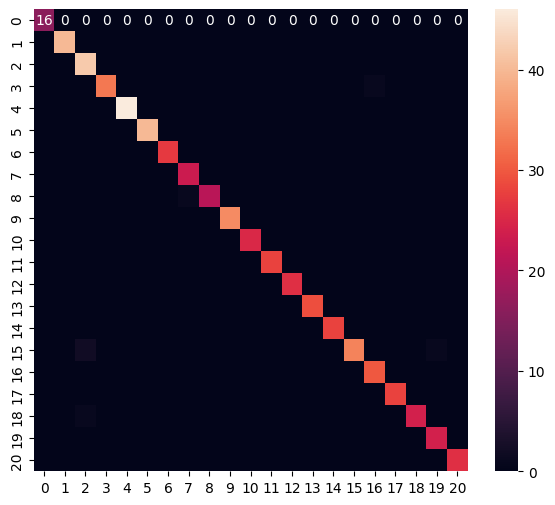

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        40
           2       0.93      1.00      0.97        42
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        27
           7       0.96      1.00      0.98        23
           8       1.00      0.95      0.98        22
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        28
          15       1.00      0.92      0.96        37
          16       0.97      1.00      0.98        30
     

In [527]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [528]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [529]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpu5mannw7\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpu5mannw7\assets


17680

# Inference test

In [530]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [531]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [532]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [533]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [534]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1628025e-09 1.6831465e-11 6.2211177e-05 1.4353121e-11 6.7517476e-09
 2.0620241e-09 1.9581556e-05 1.4901598e-06 9.2975540e-13 1.2409165e-10
 1.7322984e-07 1.2739684e-15 3.4070331e-12 1.4515950e-10 3.2850582e-09
 1.5817470e-06 6.8460806e-11 5.9929633e-10 1.3469584e-10 9.9991488e-01
 2.7581253e-09]
19
